In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose


In [84]:
np.random.seed(0)

In [85]:
data = pd.read_csv(r"../../dataset/AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [86]:
data['Month'] = pd.to_datetime(data['Month'])

In [87]:
data = data.sort_values(by='Month')

In [88]:
# data.set_index('Month', inplace=True)

In [89]:
data.dropna(inplace=True)

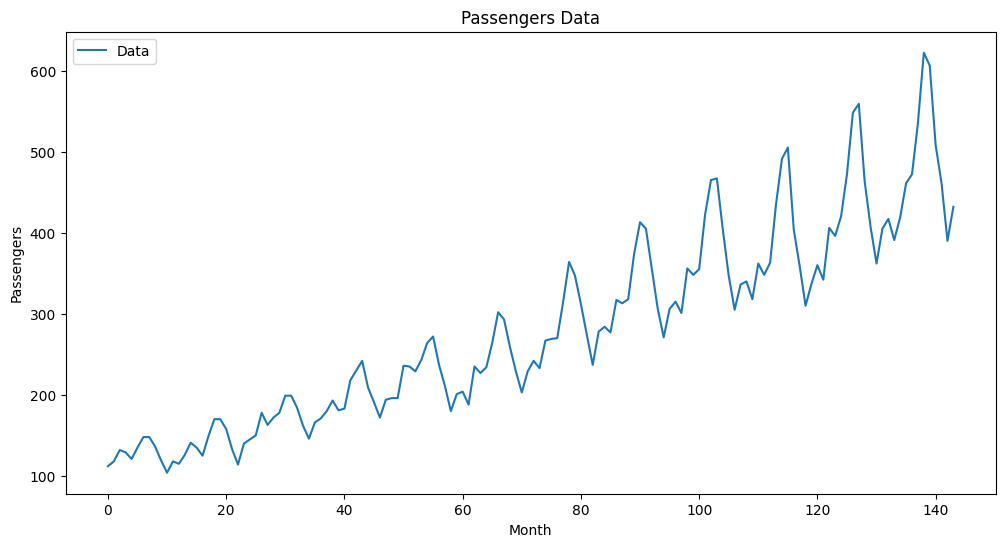

In [90]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['#Passengers'], label='Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Data')
plt.show()

In [91]:
for i in range(1, 13):  # Creating lag features up to 5 days
    data[f'Lag_{i}'] = data['#Passengers'].shift(i)

In [92]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [93]:
y_train = train_data['#Passengers']
 
y_test = test_data['#Passengers']

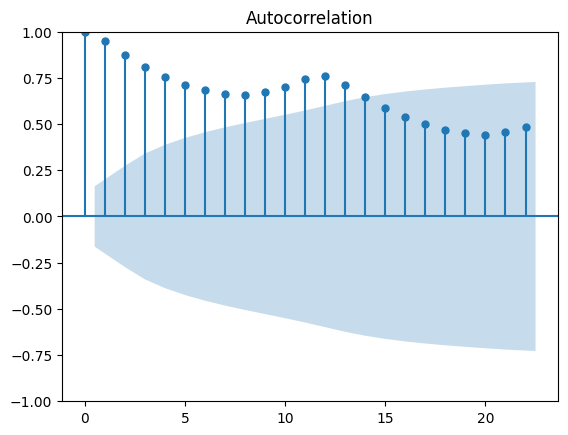

In [94]:
series = data['#Passengers']
plot_acf(series)
plt.show()

In [95]:
data['#Passengers'].corr(data['#Passengers'].shift(1))
data['#Passengers'].corr(data['#Passengers'].shift(12))

0.990527369208544

In [96]:
  
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

In [97]:
  
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)
 
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

test_data

Mean Absolute Error: 35.34
Root Mean Squared Error: 43.26


,Month,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
115,1958-08-01,505,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0,347.0,404.0,467.0
116,1958-09-01,404,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0,347.0,404.0
117,1958-10-01,359,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0,347.0
118,1958-11-01,310,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0
119,1958-12-01,337,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0
120,1959-01-01,360,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0
121,1959-02-01,342,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0
122,1959-03-01,406,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0
123,1959-04-01,396,406.0,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0
124,1959-05-01,420,396.0,406.0,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0


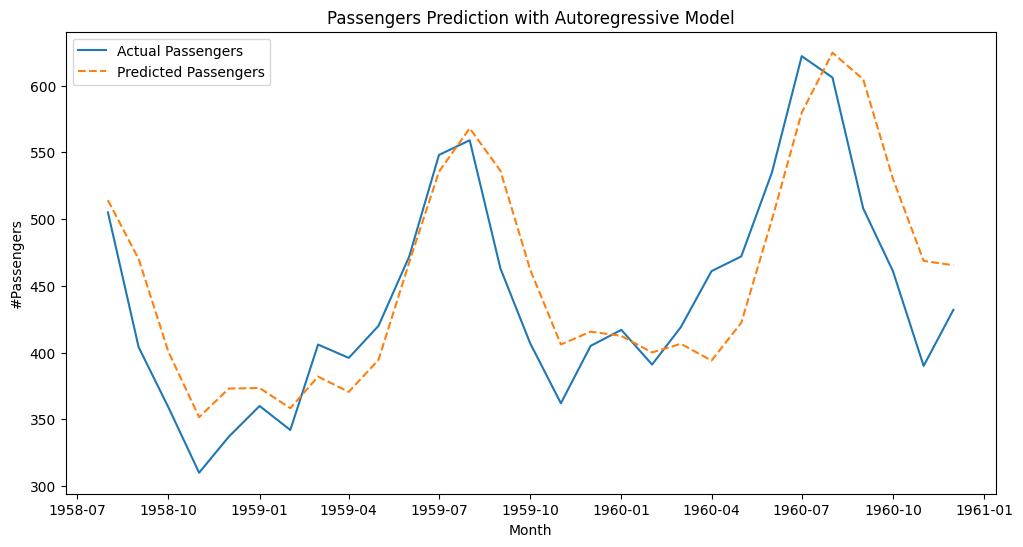

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["Month"] ,y_test, label='Actual Passengers')
plt.plot( test_data["Month"],y_pred, label='Predicted Passengers', linestyle='--')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Passengers Prediction with Autoregressive Model')
plt.show()

In [99]:
plt.style.use('default')
%matplotlib inline

In [100]:
reliance = pd.read_csv(r"../../dataset/AirPassengers.csv", index_col='Month',
                       parse_dates=True)
 
# Printing dataFrame
reliance.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [101]:
# Extract 'Close' column and convert to DataFrame
reliance = reliance['#Passengers'].to_frame()
 
# Calculate 30-day Simple Moving Average (SMA)
reliance['SMA3'] = reliance['#Passengers'].rolling(3).mean()
 
# Remove NULL values
reliance.dropna(inplace=True)
 
# Print DataFrame
reliance

,#Passengers,SMA3
Month,,
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
1949-06-01,135,128.333333
1949-07-01,148,134.666667
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


<Axes: xlabel='Month'>

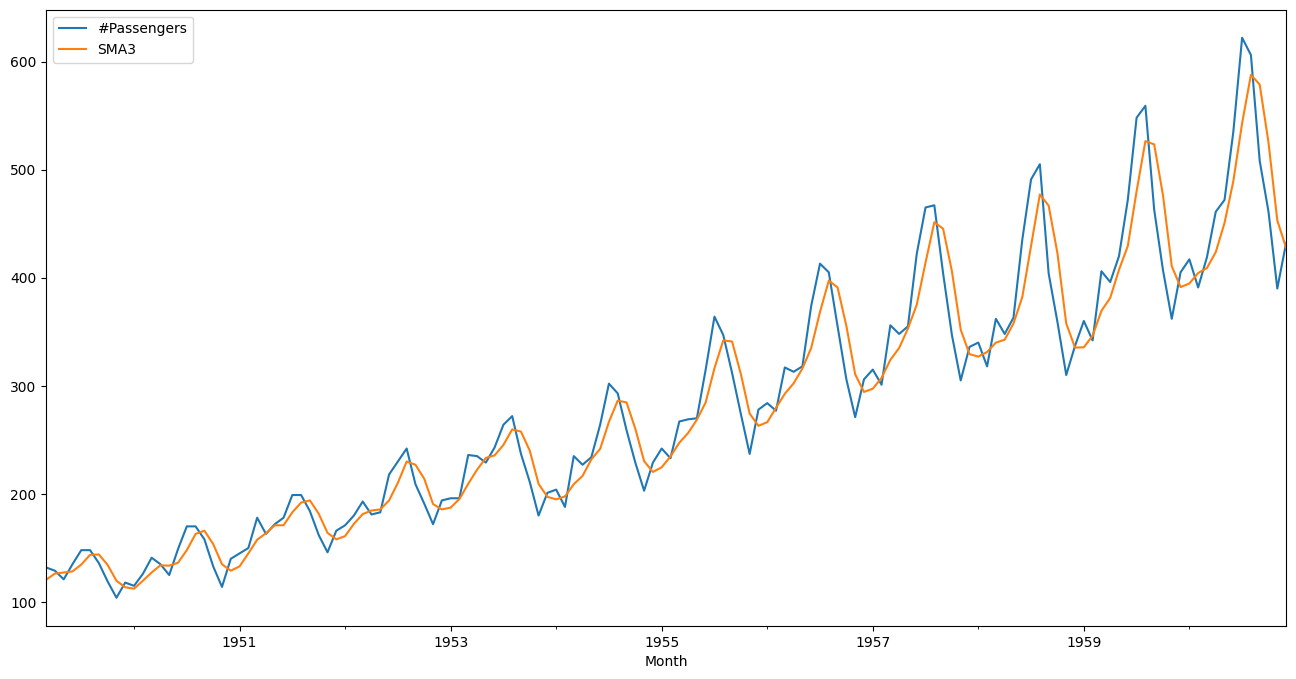

In [102]:
reliance[['#Passengers', 'SMA3']].plot(label='RELIANCE', 
                                  figsize=(16, 8))

In [103]:

# Extract and isolate 'Close' column, converting to DataFrame
reliance = reliance['#Passengers'].to_frame()
 
# Calculate Cumulative Moving Average (CMA) with a window of 30
reliance['CMA3'] = reliance['#Passengers'].expanding(3).mean()
 
# Print DataFrame
reliance

,#Passengers,CMA3
Month,,
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,127.333333
1949-06-01,135,129.250000
1949-07-01,148,133.000000
...,...,...
1960-08-01,606,277.840580
1960-09-01,508,279.496403
1960-10-01,461,280.792857


<Axes: xlabel='Month'>

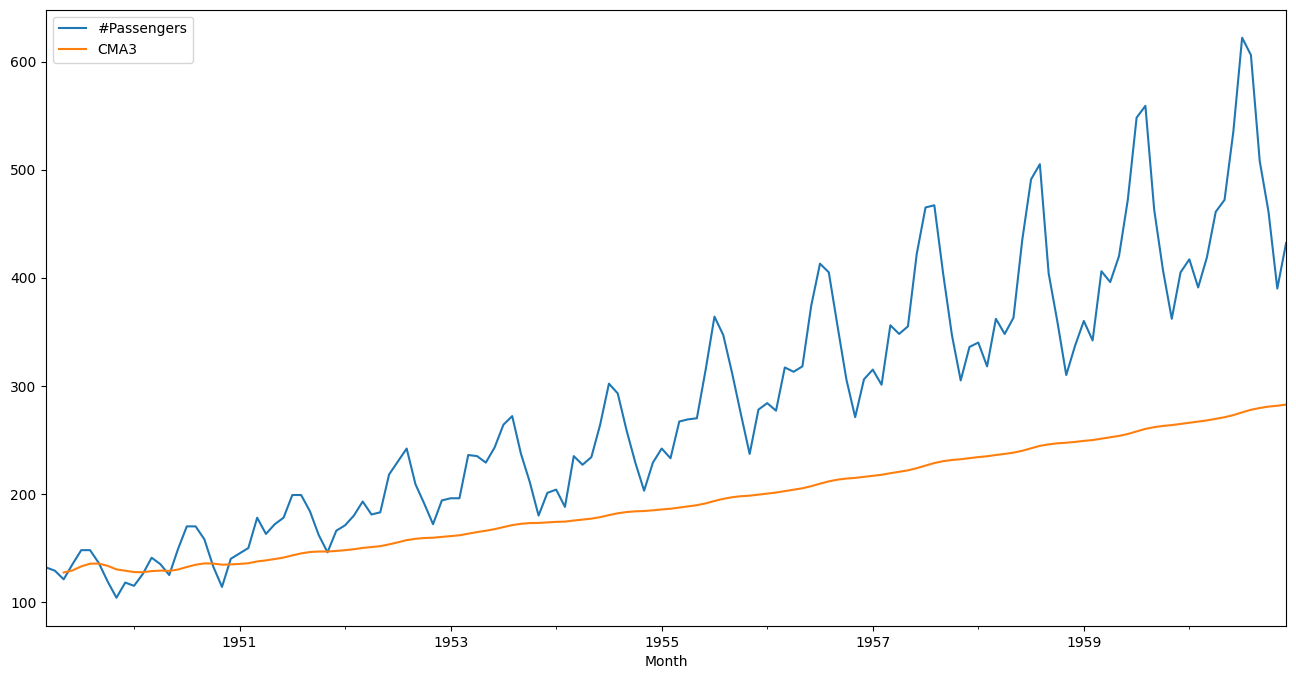

In [104]:
reliance[['#Passengers', 'CMA3']].plot(label='Passengers', 
                                  figsize=(16, 8))

<Axes: xlabel='Month'>

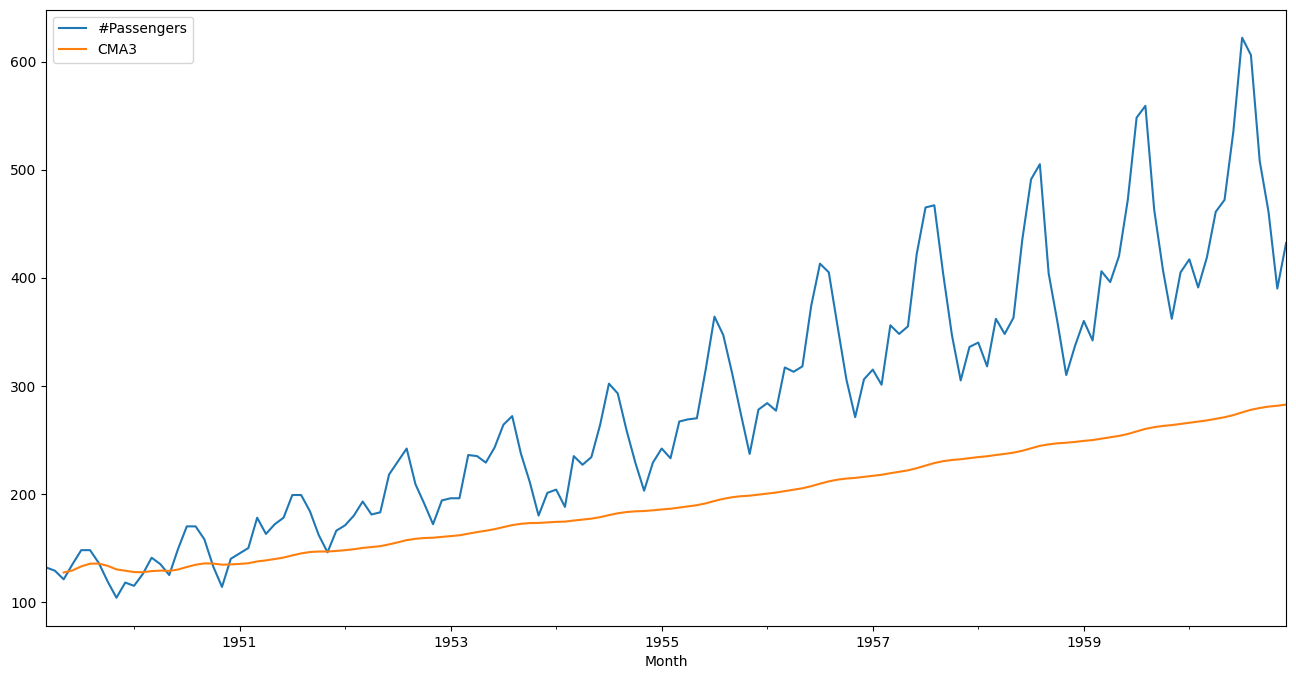

In [105]:
reliance[['#Passengers', 'CMA3']].plot(label='RELIANCE', 
                                  figsize=(16, 8))

In [106]:

# Extract and isolate 'Close' column, converting to DataFrame
reliance = reliance['#Passengers'].to_frame()
 
# Calculate Exponential Moving Average (EWMA) with a span of 30
reliance['EWMA3'] = reliance['#Passengers'].ewm(span=3).mean()
 
# Print DataFrame
reliance

,#Passengers,EWMA3
Month,,
1949-03-01,132,132.000000
1949-04-01,129,130.000000
1949-05-01,121,124.857143
1949-06-01,135,130.266667
1949-07-01,148,139.419355
...,...,...
1960-08-01,606,582.096411
1960-09-01,508,545.048205
1960-10-01,461,503.024103


<Axes: xlabel='Month'>

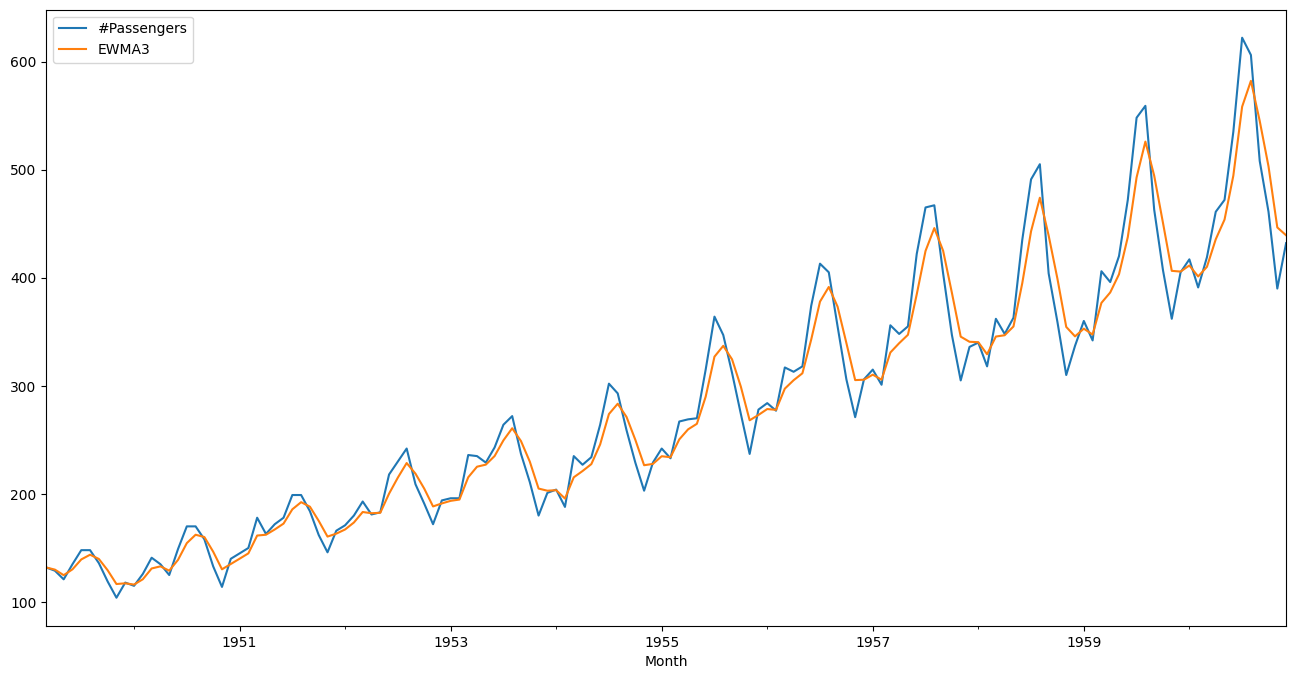

In [107]:
reliance[['#Passengers', 'EWMA3']].plot(label='RELIANCE',
                                   figsize=(16, 8))

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

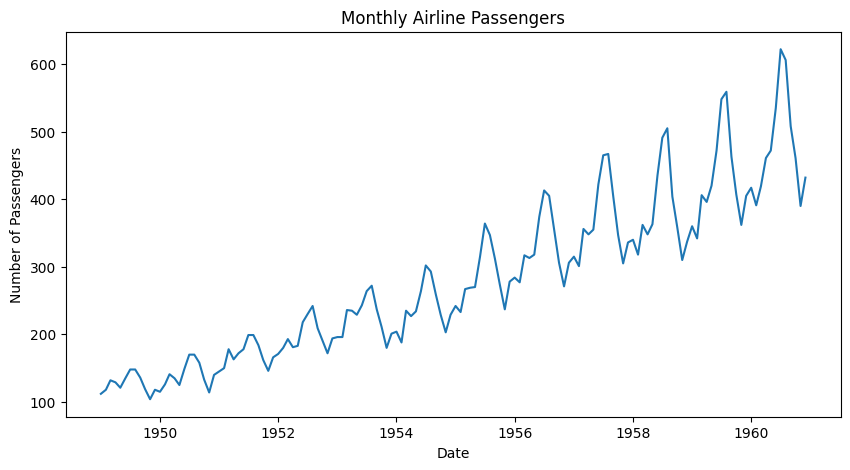

In [109]:
airline_data = pd.read_csv(r"../../dataset/AirPassengers.csv", index_col='Month',
                       parse_dates=True)

# Plot the dataset
plt.figure(figsize=(10, 5))
plt.plot(airline_data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474


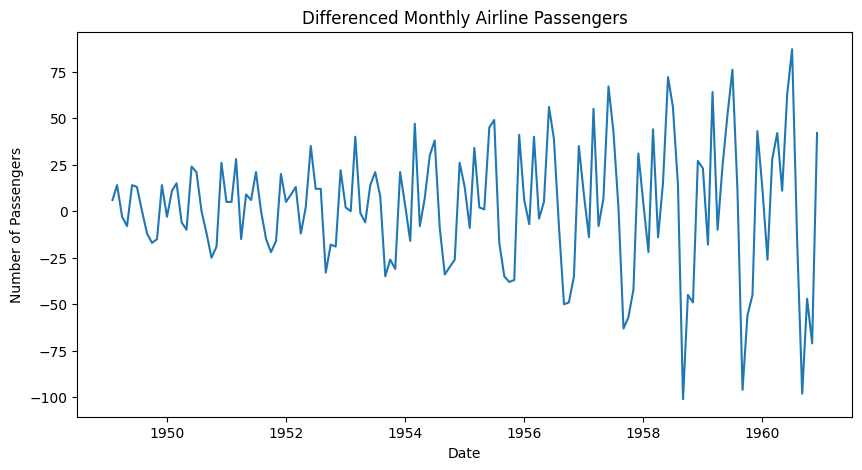

In [110]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(airline_data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = airline_data.diff().dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [111]:
# Fit the ARMA(1, 1) model
model = ARIMA(airline_data_diff, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -694.061
Date:                Tue, 23 Jul 2024   AIC                           1396.122
Time:                        11:06:10   BIC                           1407.973
Sample:                    02-01-1949   HQIC                          1400.937
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4507      3.441      0.712      0.476      -4.293       9.195
ar.L1         -0.4767      0.128     -3.735      0.000      -0.727      -0.227
ma.L1          0.8645      0.080     10.743      0.0

In [112]:
# Fit the ARIMA(1, 1, 0) model
model = ARIMA(y_train, order=(17, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:               ARIMA(17, 2, 14)   Log Likelihood                -413.618
Date:                Tue, 23 Jul 2024   AIC                            891.237
Time:                        11:06:14   BIC                            978.513
Sample:                             0   HQIC                           926.653
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8442      0.780     -1.082      0.279      -2.374       0.685
ar.L2         -0.4806      0.633     -0.759      0.448      -1.722       0.760
ar.L3         -0.4662      0.487     -0.958      0.3

C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')


Mean Absolute Error: 22.95
Root Mean Squared Error: 27.27
R Squared Error: 0.88


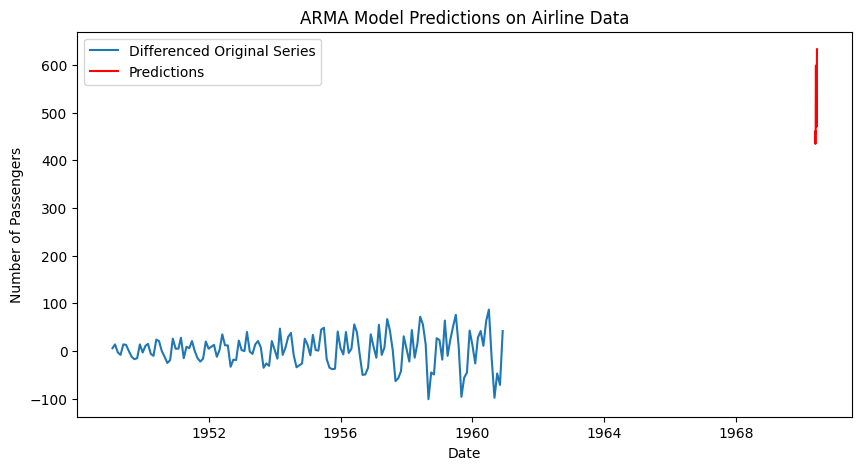

In [114]:
start = len(airline_data_diff)
end = start + 20
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [115]:
df = pd.read_csv(r"../../dataset/AirPassengers.csv")
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)
 
df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 2000x2000 with 0 Axes>

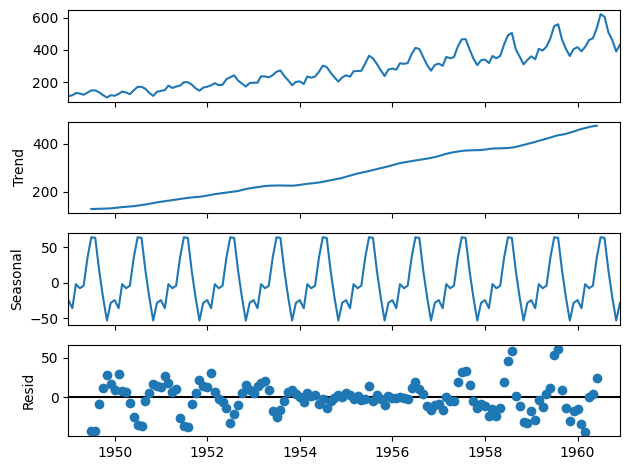

In [116]:
result = seasonal_decompose(df, model='additive', period=12)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()